<a href="https://colab.research.google.com/github/hugozub/MIAD/blob/main/Practica24_al262169.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 24: Regresión Lineal Múltiple**
# **Objetivo de aprendizaje**

Al finalizar esta práctica, el estudiante será capaz de aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

# **Datos**
Trabajarás con el archivo advertising.csv, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

* TV: inversión en publicidad televisiva.

* Radio: inversión en publicidad en radio.

* Newspaper: inversión en publicidad en periódicos.

* Sales: ventas del producto (variable dependiente).

**Parte 1: Carga de datos y bibliotecas**

* Importa las bibliotecas necesarias

* Carga el archivo advertising.csv.

* Muestra las primeras filas del dataframe.

* Describe estadísticamente las variables.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import probplot
import scipy.stats as stats
import statsmodels.api as sm

In [4]:
df = pd.read_csv('/content/drive/MyDrive/MIAD/Programación para analítica descriptiva y predictiva/Practica24/advertising.csv')
print(df.head(),"\n")
print(df.describe())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9 

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


**Parte 2: Análisis exploratorio de los datos**

**2.1. Análisis de la Relación Lineal entre la variable dependiente y las independientes**

Realiza gráficos de dispersión entre cada variable independiente (TV, Radio, Newspaper) y la variable dependiente (Sales). Usa también regplot.

* ¿Qué relación observas entre cada predictor y las ventas?



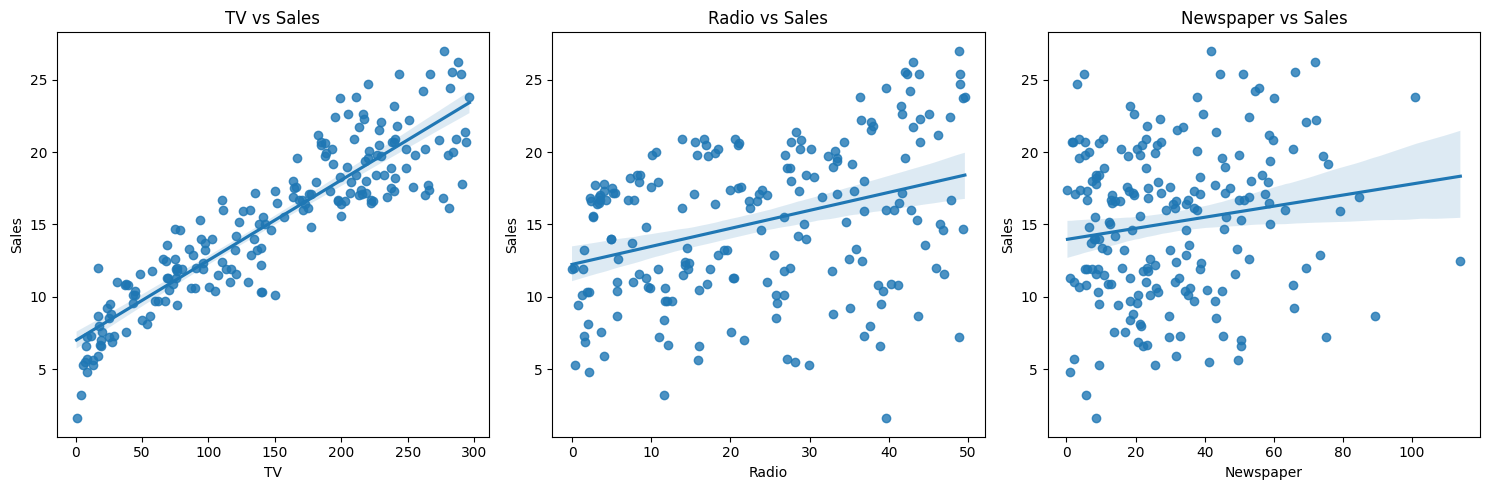

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')


plt.subplot(1, 3, 2)
sns.regplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')


plt.subplot(1, 3, 3)
sns.regplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

**2.2 Correlación entre variables**

* Calcula la matriz de correlación entre todas las variables

* Visualízala con un mapa de calor.

Responde:

* ¿Cuál variable tiene mayor correlación con Sales?
    * TV tiene un 0.9

* ¿Hay correlación alta entre predictores?
    * Solo entre TV y Sales

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


<Axes: >

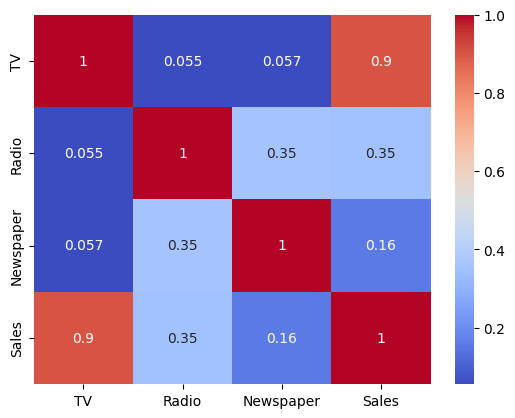

In [6]:
multiple_cor = df.corr()
print(multiple_cor)
sns.heatmap(multiple_cor, annot=True, cmap='coolwarm')


**Parte 3. Multicolinealidad**

* Calcula el VIF (Variance Inflation Factor) para cada variable independiente.
* Crea un diagrama de barras  para mostrar el  VIF

Interpreta los resultados:
* ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
    + Niguna
* ¿Qué implicaciones tiene esto para el modelo?
    + La correlación es moderada ya que están entre 1 y 5 (muy cercanas al 1), generalmente esto no causa implicaciones para el modelo


### Análisis de Multicolinealidad ###
    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


/tmp/ipython-input-3581849346.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')


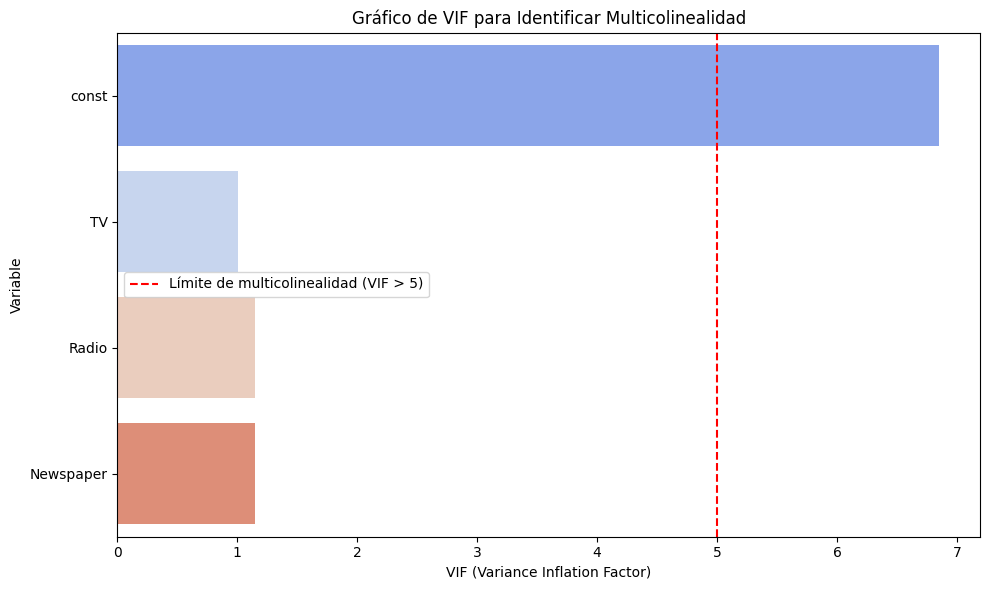

In [10]:

X = add_constant(df.drop(columns=['Sales']))
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n### Análisis de Multicolinealidad ###")
print(vif_data)


plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend()
plt.tight_layout()
plt.show()

**Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación**

**4.1 Entrenamiento del Modelo**

* Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
* Imprime el intercepto y los coeficientes del modelo.

Interpreta cada uno:
* ¿Qué significa cada uno de los coeficientes  en términos de ventas?
    + El intercepto son las ventas inciales, sin conciderar las otras variable.
    + TV: por cada unidad adicional, las ventas incermentan un 0.054446,
    + Radio: por cada unidad adicional, las ventas incrementan 0.107001
    + Newspaper: por cada unidad adicional, las ventas incrementan 0.00336

In [21]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

modelo = LinearRegression()
modelo.fit(X, y)

intercepto = modelo.intercept_
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto  :", intercepto)
print("\nCoeficientes:")
print(coeficientes)

Intercepto  : 4.625124078808653

Coeficientes:
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64


**4.2 Normalidad de los residuos**

* Calcula los residuos: residuos = y - y_pred.

* Grafica un histograma con KDE de los residuos.

* ¿Los residuos parecen distribuirse normalmente?
    * Aparentan tener una forma normal sesgado a la izquierda, sin embargo haciendo la prueba, se rechaza que haya normalidad


Shapiro–Wilk: W=0.9758, p=0.001576 -> Se rechaza normalidad (α=0.05)


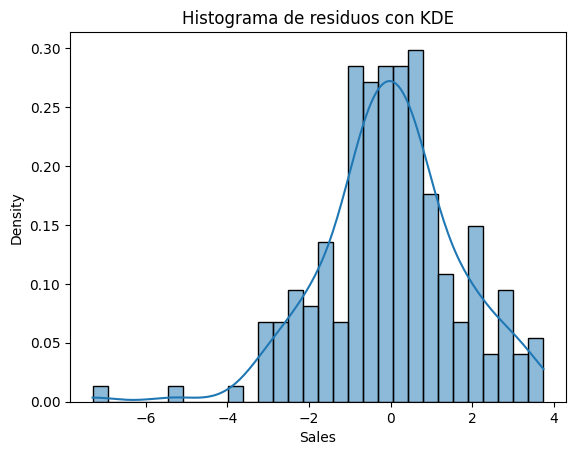

In [26]:
y_pred = modelo.predict(X)
residuos = y - y_pred

alpha = 0.05
W, p_shapiro = stats.shapiro(residuos)
print(f"Shapiro–Wilk: W={W:.4f}, p={p_shapiro:.4g} -> "
    f"{'No se rechaza normalidad' if p_shapiro>alpha else 'Se rechaza normalidad'} (α={alpha})")



sns.histplot(residuos, kde=True, stat="density", bins=30)
plt.title("Histograma de residuos con KDE")
plt.show()


**4.3. Homocedasticidad**

Grafica los residuos contra los valores predichos.

* ¿Observas patrones?
    + Se observaque existen una distribución de puntos al rededor de 0 */- 2, y la mayoría de puntos centrados hacia el 0

* ¿Los residuos se dispersan aleatoriamente?
    + No, al rededor del cero

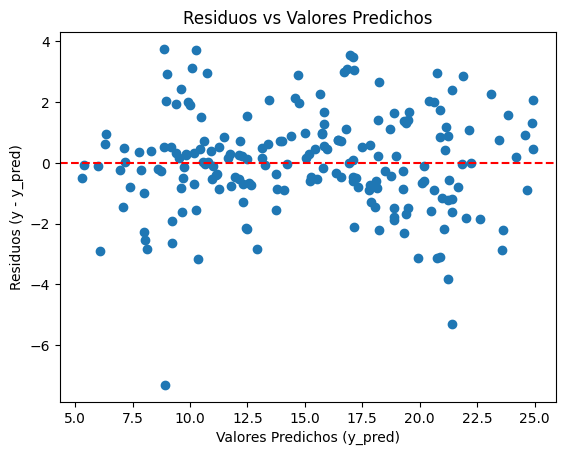

In [30]:
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos (y_pred)')
plt.ylabel('Residuos (y - y_pred)')
plt.show()


**4.4 Q-Q Plot**

* Graficar el Q-Q Plot

Interpreta el gráfico:

* El gráfico nos indica una ditribución normal de residuos, ya que están centrados al rededor de la línea recta


Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal.
Desviaciones sistemáticas indican asimetría o colas pesadas.


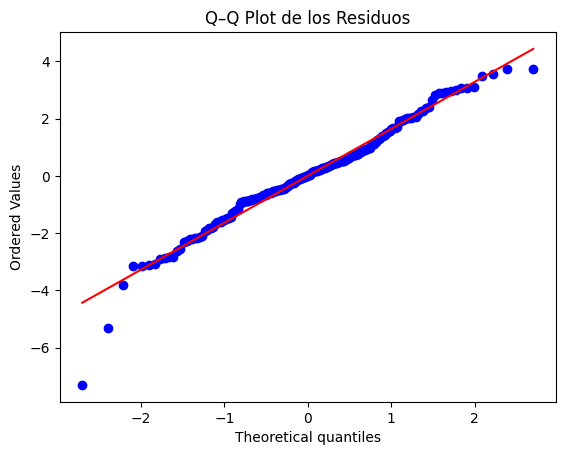

In [32]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q–Q Plot de los Residuos')
plt.show()


*4.5. Evaluación del Modelo*

Calcula las métricas:

* MSE (error cuadrático medio)

* RMSE (raíz del error cuadrático medio)

* R² (coeficiente de determinación)

* ¿Qué nos dicen estas métricas sobre el ajuste del modelo?
    + MSE: el modelo comete un error al cuadrado de 2.7 unidades de Sales
    + RMSE: el modelo se equivoca en ≈1.64 unidades de Sales por observación.
    + R^2: 90% de la variación en las ventas se explica por las tres variables "TV","Radios" y "Newspaper"


In [34]:
mse  = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y, y_pred)

print(f"MSE :{mse:.6f}")
print(f"RMSE:{rmse:.6f}")
print(f"R²  :{r2:.6f}")

MSE :2.706006
RMSE:1.644994
R²  :0.902591


**4.6. Visualización de Predicciones**

Crea un gráfico comparando Sales reales vs Sales predichas.

Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.

¿Qué observas? ¿Qué información puedes obtener de esta gráfica?
+ Se observa una distribución lineal, explicando que el modelo predice muy bien las ventas reales

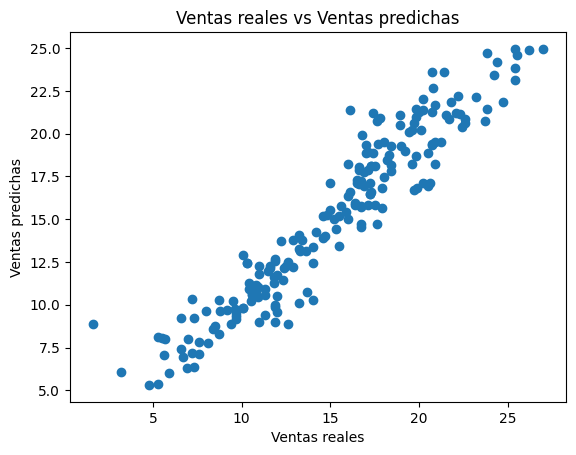

In [37]:
plt.scatter(y, y_pred)
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Ventas reales vs Ventas predichas')
plt.show()

**4.7 Verificar el impacto de los atributos en el modelo**

* Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.

Interpreta los resultados:

Observa los valores P>|t| en la tabla de salida.

* ¿Qué variables tienen p-value menores a 0.05?
      + Newspaper

* ¿Cuál es la conclusión sobre esas variables?
    + Newspaper no muestra tener un impacto estadístico en Sales, por lo que puede ser eliminado para tener mayor precisión en el modelo

In [40]:
X = df[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)
y = df['Sales']

modelo_sm = sm.OLS(y, X).fit()
# print(modelo_sm.summary())
pvals = modelo_sm.pvalues
print(pvals)
print(pvals[pvals < 0.05])

const        1.682677e-34
TV           1.892945e-95
Radio        4.602097e-27
Newspaper    9.538145e-01
dtype: float64
const    1.682677e-34
TV       1.892945e-95
Radio    4.602097e-27
dtype: float64


**Parte 5: Construcción del Modelo (sin Multicolinealidad), Evaluación**

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza lo siguiente.

**5.1 Entrenamiento del Modelo**

* Entrena un modelo de regresión lineal múltiple sin usar las variables que presentaban multicolinealidad
* Imprime el intercepto y los coeficientes del modelo.

Interpreta cada uno:
* ¿Qué significa cada uno de los coeficientes  en términos de ventas?
    + Por cada unidad adicional en TV, existe un incremento de 0.05 en ventas
    + Por cada unicadad adicional en radio, existe un incremento de 0.10 en ventas
  

In [43]:
X = df[['TV', 'Radio']]
y = df['Sales']

modelo = LinearRegression()
modelo.fit(X, y)

intercepto = modelo.intercept_
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto  :", intercepto)
print("\nCoeficientes:")
print(coeficientes)

Intercepto  : 4.630879464097768

Coeficientes:
TV       0.054449
Radio    0.107175
dtype: float64


**5.2 Normalidad de los residuos**

* Calcula los residuos: residuos = y - y_pred.

* Grafica un histograma con KDE de los residuos.

* ¿Los residuos parecen distribuirse normalmente?
    + Parece tener una distribución normal sesgada a la izquierda, pero al hacer la prueba de normalidad es rechazada


Shapiro–Wilk: W=0.9757, p=0.001541 -> Se rechaza normalidad (α=0.05)


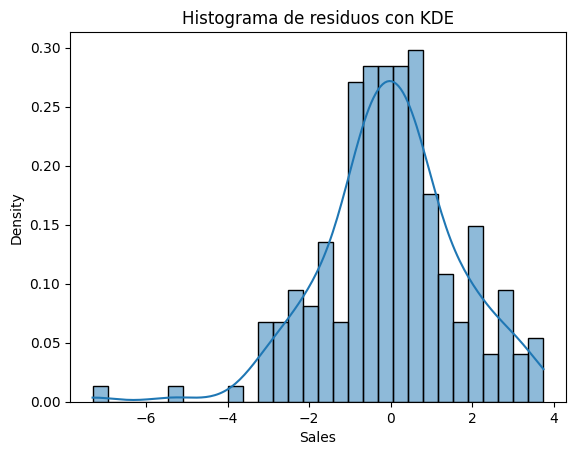

In [44]:
y_pred = modelo.predict(X)
residuos = y - y_pred

alpha = 0.05
W, p_shapiro = stats.shapiro(residuos)
print(f"Shapiro–Wilk: W={W:.4f}, p={p_shapiro:.4g} -> "
    f"{'No se rechaza normalidad' if p_shapiro>alpha else 'Se rechaza normalidad'} (α={alpha})")



sns.histplot(residuos, kde=True, stat="density", bins=30)
plt.title("Histograma de residuos con KDE")
plt.show()

**5.3. Homocedasticidad**

* Grafica los residuos contra los valores predichos.

* ¿Observas patrones?
    + Se observaque existen una distribución de puntos al rededor de 0 */- 2, y la mayoría de puntos centrados hacia el 0

* ¿Los residuos se dispersan aleatoriamente?
    + No, al rededor del cero

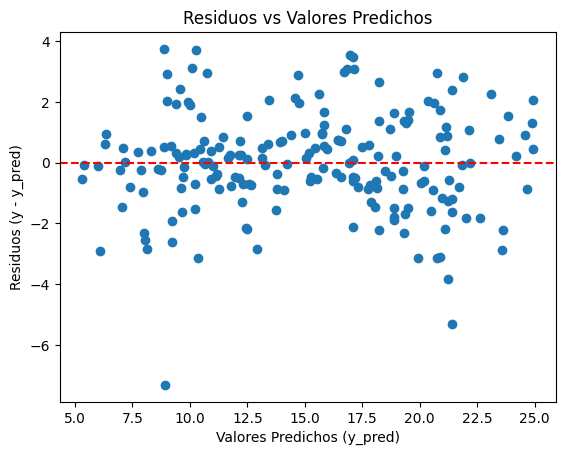

In [45]:
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos (y_pred)')
plt.ylabel('Residuos (y - y_pred)')
plt.show()


**5.4 Q-Q Plot**

* Graficar el Q-Q Plot
Interpreta el gráfico:

Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal.
Desviaciones sistemáticas indican asimetría o colas pesadas.



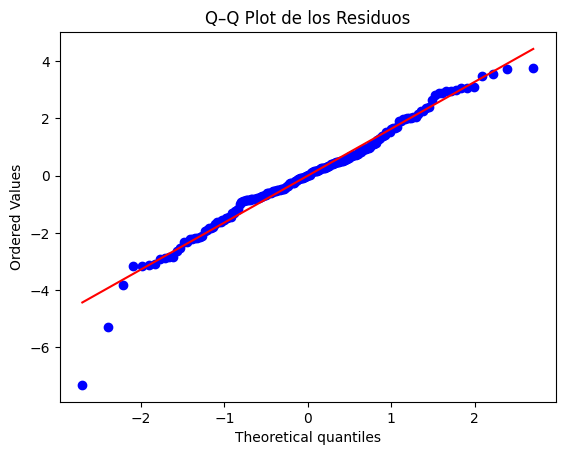

In [46]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q–Q Plot de los Residuos')
plt.show()

**5.5. Evaluación del Modelo**

Calcula las métricas:

* MSE (error cuadrático medio)

* RMSE (raíz del error cuadrático medio)

* R² (coeficiente de determinación)

* ¿Qué nos dicen estas métricas sobre el ajuste del modelo?
    + MSE: el modelo comete un error al cuadrado de 2.7 unidades de Sales
    + RMSE: el modelo se equivoca en ≈1.64 unidades de Sales por observación.
    + R^2: 90% de la variación en las ventas se explica por las tres variables "TV" y "Radio"


In [47]:
mse  = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y, y_pred)

print(f"MSE :{mse:.6f}")
print(f"RMSE:{rmse:.6f}")
print(f"R²  :{r2:.6f}")

MSE :2.706053
RMSE:1.645008
R²  :0.902590


**5.6. Visualización de Predicciones**

* Crea un gráfico comparando Sales reales vs Sales predichas.
Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
    + Se observa una distribución lineal, explicando que el modelo predice muy bien las ventas reales


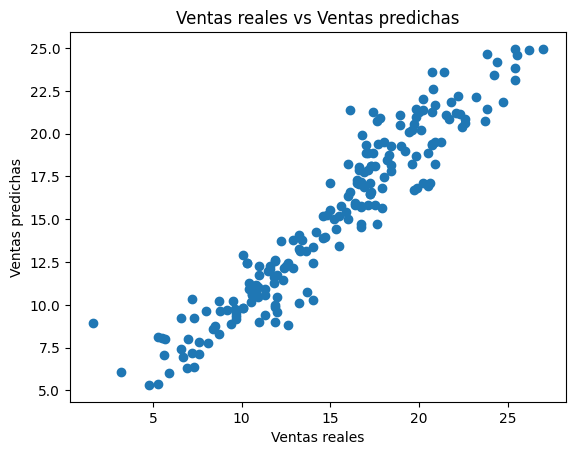

In [48]:
plt.scatter(y, y_pred)
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Ventas reales vs Ventas predichas')
plt.show()

**5.7 Verificar el impacto de los atributos en el modelo**

* Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
Interpreta los resultados:

Observa los valores P>|t| en la tabla de salida.

* ¿Qué variables tienen p-value menores a 0.05?
  + Niguno

* ¿Cuál es la conclusión sobre esas variables?
  + Estas variables funcionan muy bien para hacer un modelo

In [50]:
X = df[['TV', 'Radio']]
X = sm.add_constant(X)
y = df['Sales']

modelo_sm = sm.OLS(y, X).fit()
# print(modelo_sm.summary())
pvals = modelo_sm.pvalues
print(pvals)
print(pvals[pvals < 0.05])

const    2.526447e-37
TV       5.427771e-96
Radio    6.662856e-30
dtype: float64
const    2.526447e-37
TV       5.427771e-96
Radio    6.662856e-30
dtype: float64


**Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación**

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

**6.1 Entrenamiento del Modelo**

Entrena un modelo de regresión lineal múltiple sin usar las variables que presentaban multicolinealidad
* Imprime el intercepto y los coeficientes del modelo.

Interpreta cada uno:
* ¿Qué significa cada uno de los coeficientes  en términos de ventas?
    + TV: por cada unidad añadida, aumenta 0.05 sales

In [60]:
X = df[['TV', ]]
y = df['Sales']

modelo = LinearRegression()
modelo.fit(X, y)

intercepto = modelo.intercept_
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto  :", intercepto)
print("\nCoeficientes:")
print(coeficientes)

Intercepto  : 6.974821488229891

Coeficientes:
TV    0.055465
dtype: float64


**6.2 Normalidad de los residuos**

* Calcula los residuos: residuos = y - y_pred.

* Grafica un histograma con KDE de los residuos.

* ¿Los residuos parecen distribuirse normalmente?
    + Si, al hacer la  prueba de normalidad no se rechaza

Shapiro–Wilk: W=0.9935, p=0.5269 -> No se rechaza normalidad (α=0.05)


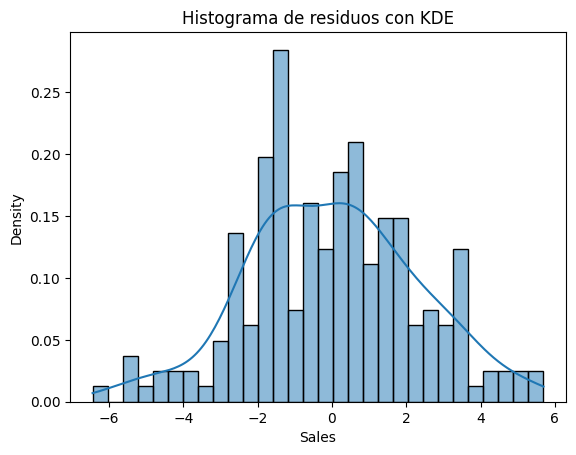

In [61]:
y_pred = modelo.predict(X)
residuos = y - y_pred

alpha = 0.05
W, p_shapiro = stats.shapiro(residuos)
print(f"Shapiro–Wilk: W={W:.4f}, p={p_shapiro:.4g} -> "
    f"{'No se rechaza normalidad' if p_shapiro>alpha else 'Se rechaza normalidad'} (α={alpha})")



sns.histplot(residuos, kde=True, stat="density", bins=30)
plt.title("Histograma de residuos con KDE")
plt.show()


**6.3. Homocedasticidad**

* Grafica los residuos contra los valores predichos.
* ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?
    + Los resiudos se ven más dispersonas que en los dos modelos anteriores ya que va de 0 +/-6, sin embargo parecen modverse al rededor de estos puntos

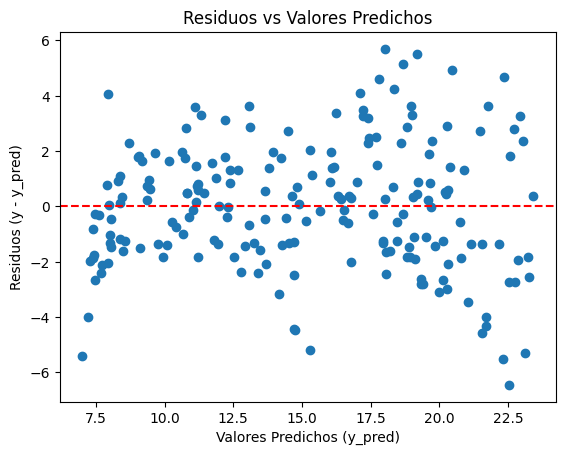

In [62]:
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos (y_pred)')
plt.ylabel('Residuos (y - y_pred)')
plt.show()


**6.4 Q-Q Plot**

* Graficar el Q-Q Plot
Interpreta el gráfico:
    * Los puntos se ajustan muy bien a la línea recta


Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal.
Desviaciones sistemáticas indican asimetría o colas pesadas.



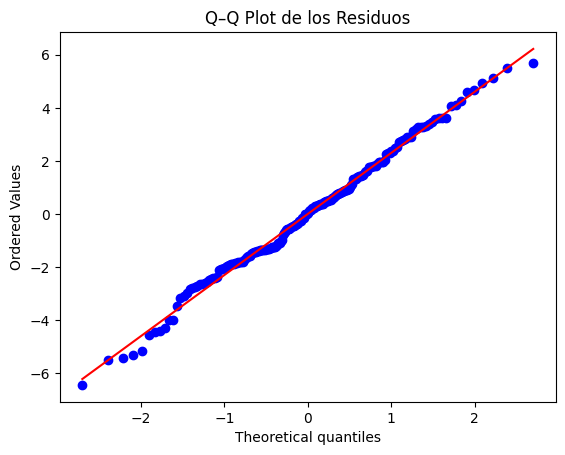

In [63]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q–Q Plot de los Residuos')
plt.show()

**6.5. Evaluación del Modelo**

Calcula las métricas:

* MSE (error cuadrático medio)

* RMSE (raíz del error cuadrático medio)

* R² (coeficiente de determinación)

* ¿Qué nos dicen estas métricas sobre el ajuste del modelo?
    + MSE: el modelo comete un error al cuadrado de 5.2 unidades de Sales
    + RMSE: el modelo se equivoca en ≈2.28 unidades de Sales por observación.
    + R^2: 81% de la variación en las ventas se explica por las variable TV

In [65]:
mse  = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y, y_pred)

print(f"MSE :{mse:.6f}")
print(f"RMSE:{rmse:.6f}")
print(f"R²  :{r2:.6f}")

MSE :5.217744
RMSE:2.284238
R²  :0.812176


**6.6. Visualización de Predicciones**

* Crea un gráfico comparando Sales reales vs Sales predichas.
Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
    ¨no parece tener un ajuste linea, sino uno exponencial



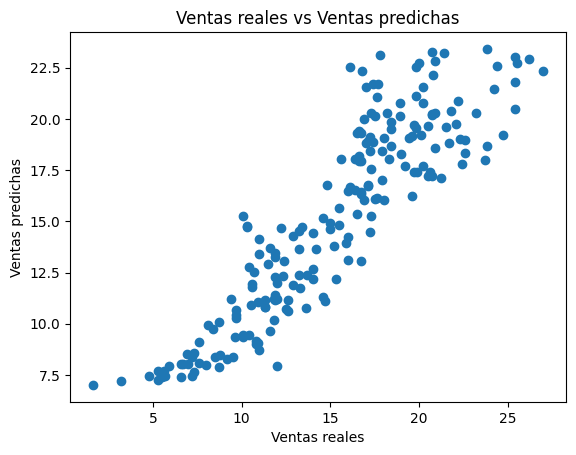

In [66]:
plt.scatter(y, y_pred)
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Ventas reales vs Ventas predichas')
plt.show()

**6.7 Verificar el impacto de los atributos en el modelo**

*Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
Interpreta los resultados:

Observa los valores P>|t| en la tabla de salida.

* ¿Qué variables tienen p-value menores a 0.05?
  + Ninguna

* ¿Cuál es la conclusión sobre esas variables?
  + Se ajusta bien para hacer un modelo

In [68]:
X = df[['TV', ]]
X = sm.add_constant(X)
y = df['Sales']

modelo_sm = sm.OLS(y, X).fit()
# print(modelo_sm.summary())
pvals = modelo_sm.pvalues
print(pvals)
print(pvals[pvals < 0.05])

const    5.027719e-54
TV       7.927912e-74
dtype: float64
const    5.027719e-54
TV       7.927912e-74
dtype: float64


7. Conclusiones.

* ¿Cuál de los tres modelos construidos fue el mejor?
  + El segundo que incluye TV y Radio, ya que el R^2 es de 90% y al hacerlo solo de TV es de 81%, aunque es un buen porcentaje para y aceptable, el 90% es mucho más preciso,
  El primer modelo es similar al segundo, ya que newspaper realmente no aportaba nada al modelo
* ¿Cuál fue el atributo que mas influencia tiene en las ventas?
  + TV tiene mayor atributo de influencia, despues Radios y al final Newspapper